In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import nltk, emoji, re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [33]:
# memasang library untuk preprocessing data 

import pandas as pd, numpy as np, nltk, string, re
from pandas import DataFrame

# mebaca data set .csv
def load_data():
    data = pd.read_csv('hasil_mentah.csv', nrows=None, header=0, names=['Tanggal','Username','Text'])
    return data

data = load_data()

data.head()

,Tanggal,Username,Text
0,2022-12-17 23:52:09+00:00,harrisregar_2,"@panca66 Ngeri, sedari awal KPU bukan wasit yg..."
1,2022-12-17 23:45:22+00:00,Akagami_N_S,@ArrazHarun @Askrlfess Rkuhp membuat nyaliku b...
2,2022-12-17 22:58:19+00:00,Irfqn_,Pasal-pasal dalam RKUHP Lebih Berbahaya dari S...
3,2022-12-17 22:32:54+00:00,KangJar72175240,@AhmadHi18173118 @abu_waras UU omnibuslaw aja ...
4,2022-12-17 22:24:07+00:00,atjayapura,Keengganan pemerintah buka draf terbaru RKUHP ...


In [34]:
# membersihkan data

def url_remove(tweet):
    t = re.sub(r'http\S+', '',tweet)
    return t

def lowercase(tweet):
    return tweet.lower()

def punc_remove(tweet):
    t = re.sub(r'[^\w\s]','',tweet)
    return t

def rt_remove(tweet):
    t = re.sub(r'RT[\s]+', '', tweet)
    return t

def number_remove(tweet):
    t = re.sub('[0-9]+', '', tweet)
    return t
    
def slang_remove(tweet):
    t = re.sub(r'\\n', " ", tweet)
    return t
    
def regex_remove(tweet):
    t = re.sub("b'", " ", tweet)
    return t

def remove_user(tweet):
    t = re.sub('@[^\s]+','',tweet)
    return t

def hashtag_remove(tweet):
    reg = "#(\w+:\/\/S+)"
    return re.sub(reg, " ", tweet)

cleaned = []

def clean_text(tweet):
    for i in tweet:
        cleaned.append(url_remove(punc_remove(number_remove(remove_user(lowercase(regex_remove(hashtag_remove(rt_remove(slang_remove(
            re.sub("[\n\r\t\xa0]"," ",i).strip()))))))))))
clean_text(data["Text"])

data['tweet'] = cleaned
data.head(10)

,Tanggal,Username,Text,tweet
0,2022-12-17 23:52:09+00:00,harrisregar_2,"@panca66 Ngeri, sedari awal KPU bukan wasit yg...",ngeri sedari awal kpu bukan wasit yg baik pan...
1,2022-12-17 23:45:22+00:00,Akagami_N_S,@ArrazHarun @Askrlfess Rkuhp membuat nyaliku b...,rkuhp membuat nyaliku berkurang
2,2022-12-17 22:58:19+00:00,Irfqn_,Pasal-pasal dalam RKUHP Lebih Berbahaya dari S...,pasalpasal dalam rkuhp lebih berbahaya dari se...
3,2022-12-17 22:32:54+00:00,KangJar72175240,@AhmadHi18173118 @abu_waras UU omnibuslaw aja ...,uu omnibuslaw aja di sahkan apa lagi rkuhp
4,2022-12-17 22:24:07+00:00,atjayapura,Keengganan pemerintah buka draf terbaru RKUHP ...,keengganan pemerintah buka draf terbaru rkuhp ...
5,2022-12-17 22:03:28+00:00,miiuriu,https://t.co/RGClZG2lAh\nnah ini lu yg bener a...,nah ini lu yg bener aja udah fitnah jatohnya ...
6,2022-12-17 17:04:39+00:00,zaqighifari24,"MALING – BINTANG EMON VS MAMAT ALKATIRI, RESIK...",maling bintang emon vs mamat alkatiri resiko ...
7,2022-12-17 16:44:51+00:00,gatholoccoo,@txtdrjkt RKUHP,rkuhp
8,2022-12-17 16:37:59+00:00,KMJlovelly,"@hyeinkari harusnya sih dia sadar ya ta, tpi n...",harusnya sih dia sadar ya ta tpi ntah lh mung...
9,2022-12-17 16:35:15+00:00,doktaviantoo,Salut dengan pasangan yang ;\n\n-Connect Zenly...,salut dengan pasangan yang connect zenly dil...


In [35]:
#kamus data
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

stopword = factory.create_stop_word_remover()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [25]:
# menghilangkan karakter

def url_remove(text):
    t = re.sub(r'https://\S+','',text)
    return t

def punc_remove(text):
    t = re.sub(r'[^\w\s]','',text)
    return t

def number_remove(text):
    t = re.sub(r"\d+", "", text)
    return t

def regex_remove(text):
    reg = "b',_" 
    return re.sub(reg, " ", text)

def emoji_remove(text):
    return emoji.get_emoji_regexp().sub("", text).strip()

def hashtag_remove(text):
    reg = "#(\w+)"
    return re.sub(reg, " ", text)

cleaned = []

def clean_text(text):
    for i in text:
        cleaned.append(punc_remove(number_remove(regex_remove(hashtag_remove(url_remove(
            re.sub("[\n\r\t\xa0]"," ",i).strip()))))))
clean_text(df["Text"])

In [36]:
#kamus data
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

stopword = factory.create_stop_word_remover()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [37]:
#menghilangkan kata yang tidak punya makna
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords]
    return clean_word_list

stopwords_tweet = data.tweet.apply(removeStopWords)

print(stopwords_tweet)

0       [ngeri, sedari, awal, kpu, bukan, wasit, yg, b...
1                    [rkuhp, membuat, nyaliku, berkurang]
2       [pasalpasal, rkuhp, lebih, berbahaya, sebelumn...
3               [uu, omnibuslaw, aja, sahkan, apa, rkuhp]
4       [keengganan, pemerintah, buka, draf, terbaru, ...
                              ...                        
4996    [pelaku, bom, bunuh, diri, polsek, astana, any...
4997    [sebenarnya, beberapa, rkuhp, diganti, diganti...
4998    [lord, rangga, meninggal, bertepatan, sah, nya...
4999    [list, kejadian, minggu, awal, desember, gempa...
5000    [rkuhp, masa, lalu, sdh, disahkan, menjadi, kuhp]
Name: tweet, Length: 5001, dtype: object


In [38]:
#melukan stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in stopwords_tweet:
    for term in document:
        if term not in term_dict:
            term_dict[term] = " "
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

stem_tweet = stopwords_tweet.apply(get_stemmed_term)

print(stem_tweet)

10461
------------------------
ngeri : ngeri
sedari : dar
awal : awal
kpu : kpu
bukan : bukan
wasit : wasit
yg : yg
baik : baik
pantesan : pantesan
buru² : buru
golkan : gol
rkuhp : rkuhp
presiden : presiden
lahir : lahir
kecurangan : curang
aman : aman
membuat : buat
nyaliku : nyali
berkurang : kurang
pasalpasal : pasalpasal
lebih : lebih
berbahaya : bahaya
sebelumnya : belum
syariahmewujudkanpersatuan : syariahmewujudkanpersatuan
uu : uu
omnibuslaw : omnibuslaw
aja : aja
sahkan : sahkan
apa : apa
keengganan : enggan
pemerintah : perintah
buka : buka
draf : draf
terbaru : baru
dinilai : nilai
tunjukkan : tunjuk
bbc : bbc
nah : nah
lu : lu
bener : bener
udah : udah
fitnah : fitnah
jatohnya : jatohnya
kena : kena
pasal : pasal
baru : baru
penghinaan : hina
ditambah : tambah
tindak : tindak
pidana : pidana
terorisme : terorisme
jelas : jelas
mendukung : dukung
gerakan : gera
orochi : orochi
m : m
top : top
maling : maling
bintang : bintang
emon : emon
vs : vs
mamat : mamat
alkatiri : alk

mengenai : kena
digodok : godok
pakar : pakar
universitas : universitas
al : al
azhar : azhar
suparji : suparji
ahmad : ahmad
menyoroti : sorot
bernuansa : nuansa
pengesahan : kesah
uukuhp : uukuhp
guru : guru
besar : besar
ilmu : ilmu
jenderal : jenderal
soedirman : soedirman
unsoed : unsoed
sebaiknya : baik
dibuka : buka
publik : publik
memberikan : beri
pandangan : pandang
dewan : dewan
sepertinya : seperti
menutup : tutup
rapat : rapat
silang : silang
pendapat : dapat
berlanjut : lanjut
sini : sini
dikatakan : kata
benar : benar
memiliki : milik
sifat : sifat
penjajahan : jajah
tarik : tarik
ulur : ulur
begini : begini
cara : cara
islam : islam
berantas : berantas
tuntas : tuntas
l : l
uukuhpmenguatkan : uukuhpmenguatkan
sekulerismeliberalisme : sekulerismeliberalisme
amp : amp
otoritarianisme : otoritarianisme
kaffah : kaffah
akal : akal
situs : situs
perwakilan : wakil
digunakan : guna
proses : proses
pembuatan : buat
termasuk : masuk
balik : balik
beliau : beliau
direktur : dire

menunjukan : tunjuk
rubah : rubah
menyebarkan : sebar
paham : paham
membungkam : bungkam
suara : suara
membahayakan : bahaya
masa : masa
islamsolusikahidupan : islamsolusikahidupan
mnrt : mnrt
agung : agung
wisnuwardhana : wisnuwardhana
cttn : cttn
cukup : cukup
konteks : konteks
msl : msl
brkn : brkn
penjelasan : jelas
clear : clear
pertanda : tanda
merugikan : rugi
muslim : muslim
depan : depan
pelanggar : langgar
dipenjara : penjara
maksimal : maksimal
diatur : atur
kapitalismebisngmasalah : kapitalismebisngmasalah
kaum : kaum
liberal : liberal
mengerikan : keri
bppbhi : bppbhi
bola : bola
bergulir : gulir
kali : kali
berkaitan : kait
pernyataan : nyata
menko : menko
polhukam : polhukam
mengatakan : kata
ayo : ayo
nonton : nonton
bagaimana : bagaimana
kapitalsmebiangmasalah : kapitalsmebiangmasalah
solusikah : solusi
benarkah : benar
permasalahan : masalah
intinya : inti
teratasi : atas
jangankan : jangan
agama : agama
didebat : debat
indo : indo
ngerasa : ngerasa
tafsirannya : tafs

disepakati : pakat
bakal : bakal
dirampungkan : rampung
gini : gin
disahin : disahin
bro : bro
sempilin : sempilin
ide : ide
haha : haha
macem : macem
ds : ds
bosnya : bos
luar : luar
scammer : scammer
kelas : kelas
kalo : kalo
judi : judi
konsorsiumnya : konsorsium
mafia : mafia
bego : bego
in : in
doang : doang
sejatinya : sejati
panja : panja
bersama : sama
intenstif : intenstif
penyelesaikan : selesai
september : september
malahan : malah
mendalami : dalam
bambang : bambang
wuriyanto : wuriyanto
menambahkan : tambah
panitia : panitia
membidangi : bidang
serangkaian : rangkai
disampaikan : sampai
mendapatkan : dapat
persetujuan : tuju
kala : kala
menyerap : serap
tatap : tatap
muka : muka
tertulis : tulis
membutuhkan : butuh
terjaga : jaga
kaidah : kaidah
prinsip : prinsip
tujuan : tuju
kendati : kendati
silih : silih
berganti : ganti
akademisi : akademisi
praktisi : praktisi
muncul : muncul
tibatiba : tibatiba
dimulainya : mula
seminar : seminar
silam : silam
episode : episode
taya

menkominfo : menkominfo
teliti : teliti
democracy : democracy
eksekutif : eksekutif
legislatifnya : legislatif
berubah : ubah
legislasinya : legislasi
landing : landing
dipermukaan : muka
diharapkan : harap
dakam : dakam
bulir : bulir
terwadahi : wadah
luas : luas
cerminanannya : cerminanannya
modal : modal
terbentuknya : bentuk
wajib : wajib
informasi : informasi
berimbang : imbang
bully : bully
mumpung : mumpung
blom : blom
membully : membully
aparatur : aparatur
bikinin : bikinin
otak : otak
paranoid : paranoid
tweets : tweets
diretweet : diretweet
bulan : bulan
terakhir : akhir
positif : positif
diperbaiki : baik
ditentukan : tentu
patut : patut
berbangga : bangga
karya : karya
batalkn : batalkn
rakyatingatkekuasaan : rakyatingatkekuasaan
bersifat : sifat
sementarastelah : sementarastelah
mnjadi : mnjadi
jimly : jimly
asshiddiqie : asshiddiqie
ekstradisi : ekstradisi
risingapura : risingapura
mudahkan : mudah
penegak : tegak
selesaikan : selesai
perkara : perkara
landmark : landmar

like : like
subscribe : subscribe
singgung : singgung
puanmaharani : puanmaharani
majemuk : majemuk
pinter : pinter
duluan : duluan
beginian : begini
gada : gada
ngata : ngata
ngatain : ngatain
wkwk : wkwk
haiii : haiii
kakakkakak : kakakkakak
bantuannya : bantu
mengisi : isi
kuesionerku : kuesioner
syaratnya : syarat
mahasiswai : mahasiswa
detailnya : detail
drop : drop
yaaa : yaaa
open : open
bo : bo
hina : hina
nihfakta : nihfakta
mengejutkan : kejut
on : on
terobosan : terobos
tutup : tutup
kominfo : kominfo
ajak : ajak
aktif : aktif
sosialisasikan : sosialisasi
kemanusiaan : manusia
retno : retno
marsudi : marsudi
uni : uni
eropa : eropa
europe : europe
respons : respons
kritikan : kritik
eggy : eggy
sudjana : sudjana
emak : emak
kawanskita : kawanskita
prediksi : prediksi
hilangnya : hilang
er : er
rkuhpbagaimana : rkuhpbagaimana
pengaruhnya : pengaruh
thd : thd
khlfh : khlfh
buset : buset
penggodokan : godok
menyebut : sebut
strategis : strategis
berhasil : hasil
persidangan : s

nyindir : nyindir
diberantas : berantas
bu : bu
meringankan : ringan
ush : ush
tuyul : tuyul
setan : setan
memaklumi : maklum
mempengaruhi : pengaruh
merahputihcom : merahputihcom
bandarasoetta : bandarasoetta
dipaksa : paksa
total : total
mengeluh : keluh
pasrah : pasrah
sesaat : saat
antikorupsi : antikorupsi
pukulan : pukul
telak : telak
pemberantasan : berantas
disorientasipemberantasankorupsi : disorientasipemberantasankorupsi
orangnya : orang
aelah : aelah
tugas : tugas
mini : mini
proposal : proposal
perilaku : perilaku
mesti : mesti
tinjau : tinjau
smester : smester
numpuk : numpuk
januari : januari
uas : uas
gin : gin
trjadi : trjadi
tahap : tahap
ditempuh : tempuh
hotroommetrotv : hotroommetrotv
rabu : rabu
jadikan : jadi
undang : undang
ketakutandan : ketakutandan
bunyi : bunyi
detilnyadan : detilnyadan
nihterbantahkan : nihterbantahkan
bunvh : bunvh
dir : dir
islma : islma
seuntidar : seuntidar
manapun : mana
tolakpemgesahanrkuhp : tolakpemgesahanrkuhp
rilis : rilis
sikap :

ngeresume : ngeresume
memberi : beri
komentar : komentar
perspektif : perspektif
butuh : butuh
ngerti : ngerti
selembar : lembar
resumenya : resume
thanks : thanks
sibuk : sibuk
pemaksaan : paksa
hijab : hijab
adakah : ada
bermaklumat : maklumat
dekat : dekat
hati : hati
beritahu : beritahu
feminism : feminism
humanrights : humanrights
globalissues : globalissues
protest : protest
mahsaamini : mahsaamini
afghanistan : afghanistan
iran : iran
iranprotests : iranprotests
philippines : philippines
myanmar : myanmar
burma : burma
myanmarcoup : myanmarcoup
melobi : lobi
jasa : jasa
pendengung : dengung
pasukan : pasu
berbayar : bayar
kampanye : kampanye
detikx : detikx
cepat : cepat
motor : motor
senayan : senayan
setebal : setebal
dipelajari : ajar
ulang : ulang
kasihan : kasihan
peralihan : alih
erksnews : erksnews
polressumedang : polressumedang
gerakanmahasiswa : gerakanmahasiswa
kantordprd : kantordprd
pengesahanrkuhp : pengesahanrkuhp
erksfm : erksfm
newserks : newserks
lppl : lppl
er

diabuse : diabuse
habisan : habis
cilaka : cilaka
moyang : moyang
walaupun : walaupun
ditentang : tentang
persilakan : sila
gugat : gugat
ipar : ipar
dicopot : copot
presidenserbapalsu : presidenserbapalsu
peluang : peluang
umkm : umkm
ibukotanegara : ibukotanegara
semangatnusantara : semangatnusantara
mengungkap : ungkap
penimbun : timbun
batalin : batalin
disyahkan : syah
klw : klw
abal : abal
meranah : ranah
internal : internal
abis : abis
seumur : umur
gt : gt
manfaat : manfaat
memunculkan : muncul
wrapup : wrapup
podcastindonesia : podcastindonesia
mempersoalkan : soal
antikritik : antikritik
kementerian : menteri
semestinya : mesti
korantempo : korantempo
empat : empat
perkembangan : kembang
pantas : pantas
diperbaharui : baharu
what : what
my : my
american : american
friend : friend
suggested : suggested
do : do
seksdiluarnikah : seksdiluarnikah
premaritalsex : premaritalsex
cancelling : cancelling
trip : trip
destinasi : destinasi
seggs : seggs
penyokong : sokong
wetboek : wetb

kemenperkraf : kemenperkraf
mr : mr
hiraiej : hiraiej
iri : iri
wisata : wisata
diminati : mati
dimiliki : milik
peninggalan : tinggal
segenap : segenap
beuki : beuki
rungkad : rungkad
kabeh : kabeh
dibatasi : batas
lpdp : lpdp
beasiswa : beasiswa
turki : turki
minnn : minnn
kawankawan : kawankawan
se : se
airku : air
sehubung : hubung
kebadutan : badut
kepingin : kepingin
pindah : pindah
outdonesia : outdonesia
kuburan : kubur
massal : massal
om : om
lambangnya : lambang
habisi : habis
privasi : privasi
diamuk : amuk
kejutan : kejut
menguntungkan : untung
visa : visa
aas : aas
rcti : rcti
seputarinews : seputarinews
pasalperzinaan : pasalperzinaan
outside : outside
marriage : marriage
pacarnya : pacar
mendidik : didik
dijerat : jerat
tendensi : tendensi
hate : hate
speech : speech
thn : thn
buktinya : bukti
kemrin : kemrin
itupeduli : itupeduli
perkataan : kata
th : th
daster : daster
wujudkan : wujud
kabardpr : kabardpr
naisonal : naisonal
kuhppembaharuanhukumpidana : kuhppembaharuan

idea : idea
oiya : oiya
twit : twit
sarkas : sarkas
mengucapkan : ucap
uda : uda
nyebarkan : nyebarkan
sepakat : sepakat
merumuskan : rumus
yag : yag
nihnegara : nihnegara
opung : opung
ama : ama
hajatan : hajat
semenjak : semenjak
pesepeda : sepeda
dijelekin : dijelekin
bosan : bosan
radikal : radikal
keperhmmm : keperhmmm
salamsatuaspal : salamsatuaspal
mencoba : coba
orangrakyat : orangrakyat
berpersepsi : persepsi
iblis : iblis
kontek : kontek
pribahasa : pribahasa
baperpelayan : baperpelayan
baper : baper
tae : tae
pwi : pwi
sukabumi : sukabumi
hgformen : hgformen
endors : endors
selingkuh : selingkuh
gentlemanschoice : gentlemanschoice
ajukan : aju
hallo : hallo
weekend : weekend
ttd : ttd
konstitusinonal : konstitusinonal
beli : beli
tikusnya : tikus
rata : rata
properti : properti
disensor : sensor
lantaran : lantar
reformulasi : reformulasi
tawarkan : tawar
digubris : gubris
disodorkan : sodor
dipujipuji : dipujipuji
sangkut : sangkut
pautin : pautin
memperbaharui : baharu
nga

bgtlah : bgtlah
lurah : lurah
sahkannya : sahkan
menggugatnya : gugat
mkkata : mkkata
kamulah : kamu
menggugatnyacoy : menggugatnyacoy
bgmn : bgmn
sbb : sbb
dipangkas : pangkas
extraordinary : extraordinary
crime : crime
lepas : lepas
digali : gali
kearifan : arif
diupayakan : upaya
dipertimbangkan : timbang
dirancang : rancang
lempar : lempar
pencerahan : cerah
kemajemukan : majemuk
bangsanya : bangsa
berkiblat : kiblat
kedekatan : dekat
ojok : ojok
nyinyir : nyinyir
ning : ning
darurat : darurat
literasi : literasi
kegocek : gocek
click : click
bait : bait
ngapa : ngapa
tapii : tapi
kementrian : tri
ngkuarin : ngkuarin
ketum : tum
gakorpan : gakorpan
abednego : abednego
panjaitan : panjaitan
gocekan : gocek
hmmmm : hmmmm
ikut²an : ikut an
mgkn : mgkn
salahnya : salah
lapangan : lapang
titik : titik
temu : temu
draftnya : draftnya
pancasilais : pancasilais
percaya : percaya
mudharatny : mudharatny
bembenk : bembenk
ngajak : ngajak
wil : wil
berlakunya : laku
gbolehin : gbolehin
plg : 

siberkreasi : siberkreasi
programnya : program
pusat : pusat
hardnews_hukum : hardnews hukum
newsone : newsone
cariberitaditvone : cariberitaditvone
mba : mba
julid : julid
cepetan : cepetan
pointpoint : pointpoint
ditelaah : telaah
wei : wei
simpul : simpul
ngutip : ngutip
opiniasumsi : opiniasumsi
hadeuhh : hadeuhh
yudisial : yudisial
kebebaaan : kebebaaan
merekam : rekam
terjamin : jamin
tourism : tourism
dijaga : jaga
perjuangkan : juang
gurih : gurih
beberkan : kan
peran : peran
pembanding : banding
bayangannya : bayang
tonangnapa : tonangnapa
executive : executive
leader : leader
samaapalagi : samaapalagi
kasi : kasi
kadernya : kader
kumpulin : kumpulin
smentara : smentara
dicekal : cekal
disahkantragisnya : disahkantragisnya
milih : milih
usir : usir
jakartaemangnya : jakartaemangnya
campur : campur
sjlebih : sjlebih
diurusin : diurusin
cicendo : cicendo
skrng : skrng
astanaanyar : astanaanyar
lab : lab
dirumahnya : rumah
janganjangan : janganjangan
menghimbau : menghimbau
menuj

mojokerto : mojokerto
teken : teken
ngada : ngada
maksa : maksa
aborsi : aborsi
genderan : gender
tusbol : tusbol
raono : raono
armor : armor
nambah : nambah
asik : asik
guess : guess
statemen : statemen
bamsoet : bamsoet
bejat : bejat
sbgai : sbgai
hanyalah : hanya
gaung : gaung
redup : redup
waspadalah : waspada
menampilkan : tampil
perannyamereka : perannyamereka
berencana : rencana
terdakwa : dakwa
membagongkanpantas : membagongkanpantas
dkk : dkk
dibela : bela
andre : andre
dihasilkan : hasil
bacot : bacot
bkrja : bkrja
brsekongkol : brsekongkol
andil : andil
meloloskan : lolos
hancur : hancur
masiku : mas
pencuri : curi
bansos : bansos
korupsinya : korupsi
tolonglah : tolong
pakdibenarkan : pakdibenarkan
pembinaankah : bina
alam : alam
sadarnya : sadar
dipkai : dipkai
cocoknya : cocok
genre : genre
matang : matang
sahsah : sahsah
kemendagri : kemendagri
dpri : dpri
heleheleheleh : heleheleheleh
komunitas : komunitas
tertanggal : tanggal
pegang : pegang
moga : moga
muak : muak
kel

kuhptanpapasalkaret : kuhptanpapasalkaret
princess : princess
dominant : dominant
haters : haters
agul : agul
payung : payung
butut : butut
peribahasa : peribahasa
sunda : sunda
membanggakan : bangga
pencapaiannya : capai
dihadapan : hadap
remeh : remeh
temeh : temeh
olok : olok
pakah : pakah
penyebab : sebab
siapkan : siap
pengamannya : kam
implementasi : implementasi
ybs : ybs
habiburokhman : habiburokhman
ditemukan : temu
bertuliskan : tulis
syirikkafir : syirikkafir
perangi : rang
qs : qs
kaitan : kait
cameoproject : cameoproject
bomastanaanyar : bomastanaanyar
filsuf : filsuf
aliran : alir
hegelianisme : hegelianisme
realita : realita
kontradiskusi : kontradiskusi
alf : alf
indom : indom
mengesahan : kesah
dewanpers : dewanpers
kebebasanpers : kebebasanpers
menterihukumdanham : menterihukumdanham
winaarmada : winaarmada
popularitascom : popularitascom
rasullulah : rasullulah
gantinya : ganti
hadeh : hadeh
ng : ng
menduga : duga
laksana : laksana
angkot : angkot
kejar : kejar
setor

merespon : merespon
penghidupannya : hidup
mainstream : mainstream
government : government
oppression : oppression
ppls : ppls
rights : rights
memusingkan : pusing
nicho : nicho
silalahi : silalahi
bertopengkan : topeng
mamam : mamam
tah : tah
simbah : simbah
mempekerjakan : kerja
dibawah : bawah
umur : umur
bahlul : bahlul
misal : misal
bpk : bpk
hapuskan : hapus
primitif : primitif
merepresentasikan : representasi
ketololan : tolol
pemuka : muka
terjebak : jebak
fanatisme : fanatisme
buta : buta
mengimplentasikan : mengimplentasikan
diduitin : diduitin
trkait : trkait
aex : aex
harkristuti : harkristuti
kepikiran : pikir
birokrat : birokrat
korporat : korporat
nasibmu : nasib
tsar : tsar
alexander : alexander
nicolai : nicolai
padahlkan : padahlkan
hs : hs
sembarang : sembarang
pantai : pantai
dikira : kira
upacara : upacara
mecaru : mecaru
hebatkan : hebat
nynyirin : nynyirin
diiklan : iklan
beribin : beribin
bengi : bengi
bokat : bokat
laporaken : laporaken
apaan : apa
tiktod : tik

kajalan : kajalan
dihiraukan : hirau
penjelasannya : jelas
sarat : sarat
coverstoryone : coverstoryone
bau : bau
blunder : blunder
tertolol : tolol
plus : plus
duitnya : duit
menggelikan : geli
wadah : wadah
memperluas : luas
ributinkalo : ributinkalo
hukumkalo : hukumkalo
hutan : hutan
sendirian : sendiri
repot : repot
h : h
mencolek : colek
exstrimis : exstrimis
love : love
u : u
more : more
than : than
pertahanan : tahan
maysarkat : maysarkat
menyalurkan : salur
yhaaaa : yhaaaa
captionnya : captionnya
mositidakpercaya : mositidakpercaya
buzzerkuhp : buzzerkuhp
bberapa : bberapa
mengesahkanny : mengesahkanny
paripurnaselasa : paripurnaselasa
semaksimal : maksimal
meminimalisir : meminimalisir
opiniseorangsipilyangawam : opiniseorangsipilyangawam
semisal : misal
dipidanakan : pidana
penjebaknya : jebak
baikbaik : baikbaik
startup : startup
winter : winter
mendoan : mendoan
gbk : gbk
runtah : runtah
also : also
dilebihlebihkan : dilebihlebihkan
kaadang : kaadang
ngalamin : ngalamin
sal

bklan : bklan
pssi : pssi
pt : pt
lib : lib
indosiar : indosiar
kebanggaanmu : bangga
macammacam : macammacam
acab : acab
kanjuruhanmassacre : kanjuruhanmassacre
makassarsupportercollective : makassarsupportercollective
nojusticenofootball : nojusticenofootball
polisisundala : polisisundala
jembut : jembut
kompeten : kompeten
studi : studi
munculnya : muncul
kerugian : rugi
diislam : islam
systemickrn : systemickrn
sahspt : sahspt
azasi : azasi
manusipdhal : manusipdhal
waris : waris
radikalradikul : radikalradikul
menghabiskan : habis
diseluruh : seluruh
sanggup : sanggup
ngecap : ngecap
simplifikasi : simplifikasi
berperan : peran
seni : seni
berdukacita : dukacita
menutupi : tutup
ketidakmampuan : ketidakmampuan
bekerjadan : bekerjadan
berbohong : bohong
ngutang : ngutang
habishabisan : habishabisan
pembebasan : bebas
bersyarat : syarat
ganjil : ganjil
ngeriii : ngeriii
pengancaman : ancam
unik : unik
pementasan : mentas
tari : tari
pagelaran : pagelaran
stand : stand
comedy : comed

dppknpi : dppknpi
berasumsi : asumsi
penjagaan : jaga
jm : jm
terbakar : bakar
pencegahan : cegah
teknisi : teknisi
orasi : orasi
tenda : tenda
kremlin : kremlin
clurit : clurit
jancuk : jancuk
jaringan : jaring
domba : domba
remote : remote
duarr : duarr
ccp : ccp
ketar : ketar
ketir : tir
nafas : nafas
pipis : pipis
bab : bab
skalian : skalian
nyet : nyet
kuhap : hap
wkwkwkwkw : wkwkwkwkw
rela : rela
bah : bah
amal : amal
hmm : hmm
berteman : teman
farright : farright
fb : fb
anehnya : aneh
lelucon : lelucon
setengah : tengah
masyarakatny : masyarakatny
dibodohi : bodoh
akwwkwk : akwwkwk
mumpuni : mumpuni
rekrut : rekrut
bnn : bnn
setia : setia
melaksanakan : laksana
mendemo : demo
mereda : reda
fafifu : fafifu
muatannya : muat
tahanannya : tahan
ketutup : tutup
temenku : temenku
twitternya : twitternya
suspend : suspend
set : set
benerrr : benerrr
ajaa : ajaa
kontroversialnya : kontroversial
from : from
rudalnya : rudal
alig : alig
baladanegarapocopoco : baladanegarapocopoco
pelayan

togut : togut
ampterorisme : ampterorisme
dagangan : dagang
terlaris : laris
panggil : panggil
aneehhhhh : aneehhhhh
internet : internet
atu : atu
problematiknya : problematik
memfilter : filter
tangguh : tangguh
bdh : bdh
jiaaah : jiaaah
hayoloh : hayoloh
dibhas : dibhas
penyalahgunaan : penyalahgunaan
trjd : trjd
sklpn : sklpn
menguasainya : kuasa
plis : plis
kmu : kmu
mjawab : mjawab
dihadapi : hadap
kale : kale
malihhhhhhh : malihhhhhhh
boong : boong
it : it
believable : believable
balita : balita
misnurpasal : misnurpasal
shrsnya : shrsnya
masyjuga : masyjuga
bedabeda : bedabeda
motif : motif
gede : gede
biak : biak
kerok : kerok
perpanjang : panjang
penunjukan : tunjuk
aroma : aroma
mengamankan : aman
sebetul : betul
bginilah : bginilah
nyadar : nyadar
diotakatik : diotakatik
berkukuh : kukuh
apbd : apbd
albajilipengesahan : albajilipengesahan
demokrasisuara : demokrasisuara
jargon : jargon
pidanarkuhpdpr : pidanarkuhpdpr
riamppemerintah : riamppemerintah
undang² : undang
meningk

genks : genks
innalilahi : innalilahi
dipinpoint : dipinpoint
segggs : segggs
kpj : kpj
mnctvnews : mnctvnews
lintasinews : lintasinews
mnctv : mnctv
hadiri : hadir
mbkbfm : mbkbfm
atek : atek
ngurusi : ngurusi
taekan : taekan
tanggungan : tanggung
akeh : akeh
urip : urip
dewe : dewe
geng : geng
mbok : mbok
jahad : jahad
apalah : apa
skena : skena
benalu : benalu
smh : smh
vidio : vidio
ijab : ijab
dipastikan : pasti
bbs : bbs
kpntingn : kpntingn
msyarakat : msyarakat
klu : klu
ditengahtengah : ditengahtengah
gencarnya : gencar
mudahnya : mudah
diutak : diutak
atik : atik
lansung : lansung
za : za
mengakomodasi : akomodasi
disahkanlangkah : disahkanlangkah
mendingtvanalog : mendingtvanalog
겨울이_피워낸_성훈이라는_눈꽃 : 
spanyol : spanyol
iuuf : iuuf
jorji : jorji
ngebentuk : ngebentuk
gelarnya : gelar
lulus : lulus
pantang : pantang
petang : petang
sumenesabana : sumenesabana
sumenepdengansegalakeindahannya : sumenepdengansegalakeindahannya
keberagaman : agam
mmperkuat : mmperkuat
mnjamin : mnjam

mabok : mabok
ugem : ugem
setujukan : tuju
raiso : raiso
saiki : saiki
sahhh : sahhh
melbu : melbu
duwe : duwe
samph : samph
majority : majority
voice : voice
implement : implement
pedas : pedas
badut : badut
curhat : curhat
soale : soale
eroh : eroh
lek : lek
terdekatku : dekat
bocil : bocil
simpel : simpel
violence : violence
always : always
hukam : hukam
panganen : panganen
taek : taek
sak : sak
mengkonter : konter
tumbuh : tumbuh
subur : subur
ikp : ikp
grgr : grgr
yak : yak
merampas : rampas
persembahan : sembah
nataruskrg : nataruskrg
selajutnya : selajutnya
manfaatin : manfaatin
aduin : aduin
bejomu : bejomu
meh : meh
boomerang : boomerang
kontrasepsi : kontrasepsi
antiislam : antiislam
momennya : momen
spesisik : spesisik
diintai : intai
intel : intel
ajg : ajg
mentingin : mentingin
ayoksi : ayoksi
ketiringat : ketiringat
disetting : disetting
dipojokkan : pojok
dilepasin : dilepasin
dibrainwash : dibrainwash
chatgpt : chatgpt
enzy : enzy
aktvis : aktvis
ramairamai : ramairamai

prosteriori : prosteriori
tinut : tinut
uanehe : uanehe
kepoin : poin
seputar : putar
jembatan : jembatan
saluran : salur
memfasilitasi : fasilitas
totalitarianisme : totalitarianisme
faisal : faisal
saidi : saidi
fundamentalis : fundamentalis
isiy : isiy
ajalol : ajalol
genggam : genggam
tanganku : tangan
tongkrongan : tongkrong
anime : anime
bankai : bankai
waahh : waahh
pencerahannyaa : pencerahannyaa
menerus : terus
mrek : mrek
pduli : pduli
tdkmereka : tdkmereka
pnya : pnya
susahny : susahny
seakanakan : seakanakan
wegah : wegah
diusik : usik
alihalih : alihalih
dirumuskannya : rumus
menerobos : terobos
batasbatas : batasbatas
zulkifli : zulkifli
kinerja : kerja
penampakan : tampak
muncur : muncur
dp : dp
hafal : hafal
yamaha : yamaha
haahahaha : haahahaha
dituliskan : tulis
dihapuskannya : hapus
mengurangi : kurang
rancangn : rancangn
negra : negra
tsbt : tsbt
ngedukung : ngedukung
napa : napa
gantiin : gantiin
kesal : kesal
denial : denial
pengantin : pengantin
jugalah : juga
ma

In [39]:
normalizad_word = pd.read_excel("normalization.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

normal_tweet = stem_tweet.apply(normalized_term).str.join(" ")

print(normal_tweet)

0       ngeri dar awal kpu bukan wasit yang baik pante...
1                                 rkuhp buat nyali kurang
2       pasalpasal rkuhp lebih bahaya belum syariahmew...
3                     UU omnibuslaw saja sahkan apa rkuhp
4       enggan perintah buka draf baru rkuhp nilai tun...
                              ...                        
4996    laku bom bunuh diri polsek astana anyar bawa b...
4997                 benar beberapa rkuhp ganti ganti sih
4998    lord rangga tinggal tepat sah nya rkuhp apa ma...
4999    list jadi minggu awal desember gempa bom bunuh...
5000                  rkuhp masa lalu sudah sah jadi kuhp
Name: tweet, Length: 5001, dtype: object


In [40]:
#hasil bersih data yang sudah di cleaning

data_preprocess = normal_tweet

data_preprocess

0       ngeri dar awal kpu bukan wasit yang baik pante...
1                                 rkuhp buat nyali kurang
2       pasalpasal rkuhp lebih bahaya belum syariahmew...
3                     UU omnibuslaw saja sahkan apa rkuhp
4       enggan perintah buka draf baru rkuhp nilai tun...
                              ...                        
4996    laku bom bunuh diri polsek astana anyar bawa b...
4997                 benar beberapa rkuhp ganti ganti sih
4998    lord rangga tinggal tepat sah nya rkuhp apa ma...
4999    list jadi minggu awal desember gempa bom bunuh...
5000                  rkuhp masa lalu sudah sah jadi kuhp
Name: tweet, Length: 5001, dtype: object

In [41]:
clean={"Username":data['Username'], "Cleaned_Text":data_preprocess}

df=pd.DataFrame(clean)
df.to_excel("hasil_preprocessing.xlsx", index=False, encoding='utf8')

# data training

In [1]:
# memasang library pandas
import pandas as pd

In [29]:
#membaca data

df = pd.read_excel (r'data_training.xlsx', sheet_name='Sheet1')
df=pd.DataFrame(df)
df

,Unnamed: 0,tweet,label,kelas
0,0,ngeri dar awal kpu bukan wasit yang baik pante...,negatif,0
1,1,rkuhp buat nyali kurang,positif,1
2,2,pasalpasal rkuhp lebih bahaya belum syariahmew...,positif,1
3,3,UU omnibuslaw saja sahkan apa rkuhp,negatif,0
4,4,enggan perintah buka draf baru rkuhp nilai tun...,negatif,0
...,...,...,...,...
596,596,rkuhp buat profesional kredibel,negatif,0
597,597,rkuhp mantap,positif,1
598,598,rkuhp baik sistem hukum baik rakyat indonesia,negatif,0
599,599,mf mau tanya bung kemarin sidang paripurna dpr...,negatif,0


In [30]:
#jumlah data yang sudaah di label
df.label.value_counts()

negatif    302
positif    299
Name: label, dtype: int64

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

d1 = "UU yang berada di KUHP membuat masyarakat tidak bisa mengkritik pemerintah"
d2 = "didalam KUHP terdapa pasal pasal karet"
d3 = "rata rata pendemo dari kalangan mahasiswa"
d4 = "rumor disahkannya KHUP di Mahkamah Konstitusi"

vect = TfidfVectorizer()
X = vect.fit_transform([d1, d2, d3, d4])

X.toarray()

array([[0.31245141, 0.31245141, 0.        , 0.24634028, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24634028, 0.        , 0.        , 0.31245141, 0.31245141,
        0.31245141, 0.        , 0.31245141, 0.        , 0.        ,
        0.        , 0.        , 0.31245141, 0.31245141, 0.31245141],
       [0.        , 0.        , 0.        , 0.        , 0.36222393,
        0.        , 0.        , 0.36222393, 0.        , 0.        ,
        0.2855815 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.72444785, 0.        , 0.        , 0.        ,
        0.        , 0.36222393, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.35355339, 0.        , 0.        ,
        0.        , 0.35355339, 0.        , 0.        , 0.        ,
        0.        , 0.35355339, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.35355339, 0.70710678,
        0.        , 0.        , 0.        , 0.

In [32]:
list(zip(X.toarray()[0], vect.get_feature_names()))

/home/tsbh/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0.31245140686099954, 'berada'),
 (0.31245140686099954, 'bisa'),
 (0.0, 'dari'),
 (0.24634027802537617, 'di'),
 (0.0, 'didalam'),
 (0.0, 'disahkannya'),
 (0.0, 'kalangan'),
 (0.0, 'karet'),
 (0.0, 'khup'),
 (0.0, 'konstitusi'),
 (0.24634027802537617, 'kuhp'),
 (0.0, 'mahasiswa'),
 (0.0, 'mahkamah'),
 (0.31245140686099954, 'masyarakat'),
 (0.31245140686099954, 'membuat'),
 (0.31245140686099954, 'mengkritik'),
 (0.0, 'pasal'),
 (0.31245140686099954, 'pemerintah'),
 (0.0, 'pendemo'),
 (0.0, 'rata'),
 (0.0, 'rumor'),
 (0.0, 'terdapa'),
 (0.31245140686099954, 'tidak'),
 (0.31245140686099954, 'uu'),
 (0.31245140686099954, 'yang')]

In [33]:
list(zip(X.toarray()[1], vect.get_feature_names()))

[(0.0, 'berada'),
 (0.0, 'bisa'),
 (0.0, 'dari'),
 (0.0, 'di'),
 (0.36222392540501064, 'didalam'),
 (0.0, 'disahkannya'),
 (0.0, 'kalangan'),
 (0.36222392540501064, 'karet'),
 (0.0, 'khup'),
 (0.0, 'konstitusi'),
 (0.2855815033388837, 'kuhp'),
 (0.0, 'mahasiswa'),
 (0.0, 'mahkamah'),
 (0.0, 'masyarakat'),
 (0.0, 'membuat'),
 (0.0, 'mengkritik'),
 (0.7244478508100213, 'pasal'),
 (0.0, 'pemerintah'),
 (0.0, 'pendemo'),
 (0.0, 'rata'),
 (0.0, 'rumor'),
 (0.36222392540501064, 'terdapa'),
 (0.0, 'tidak'),
 (0.0, 'uu'),
 (0.0, 'yang')]

In [34]:
vect = TfidfVectorizer(max_features=600, binary=True)
X = vect.fit_transform(df.tweet)

X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
from sklearn.model_selection import train_test_split

X = df.tweet
y = df.kelas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=600, binary=True)
X_train_vect = vect.fit_transform(X_train)

In [37]:
print(X_train_vect)

  (0, 13)	0.979447334698521
  (0, 438)	0.2017000707782807
  (1, 143)	0.22778926860495666
  (1, 545)	0.2503316273823418
  (1, 533)	0.41859897062830076
  (1, 255)	0.33337959850004817
  (1, 230)	0.36848289111128396
  (1, 97)	0.3892829434276863
  (1, 513)	0.3892829434276863
  (1, 12)	0.272917010391516
  (1, 301)	0.28326351898303137
  (1, 438)	0.07412889892970932
  (2, 266)	0.246505073471309
  (2, 49)	0.3546906543656633
  (2, 550)	0.32797969503199526
  (2, 411)	0.3814016136993313
  (2, 394)	0.233092517606267
  (2, 33)	0.40035334094939834
  (2, 179)	0.19573305737394517
  (2, 129)	0.32797969503199526
  (2, 488)	0.30375496779531985
  (2, 532)	0.3210388254162557
  (2, 438)	0.06754168943872288
  (3, 28)	0.5975800568799939
  (3, 184)	0.7876556744135754
  :	:
  (477, 85)	0.13390911261069485
  (477, 346)	0.13651543456794182
  (477, 297)	0.13982261357996037
  (477, 221)	0.11314352698916892
  (477, 265)	0.12998897616292604
  (477, 28)	0.21607757143410034
  (477, 438)	0.054234067196196965
  (478, 309)

In [38]:
!pip install imblearn

In [39]:
#Libary prediksi

from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

In [40]:
import numpy as np

In [41]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 240), (1, 240)]


naive bayes

In [42]:
#Libary NBC
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)
nb.score(X_train_res, y_train_res)

0.8041666666666667

In [43]:
# variable untuk prediksi

X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [44]:
# mengukur akurasi dan f1-score 

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='weighted') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 58.68%

F1 Score: 58.69

COnfusion Matrix:
 [[37 26]
 [24 34]]


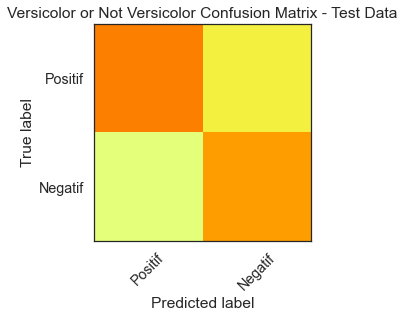

In [45]:
#pembuatan matriks TP, TN. FP, FN

import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

cm=confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positif','Negatif']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
# s = [['TN','FP'], ['FN', 'TP']]
# for i in range(3):
#     for j in range(3):
#         plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [46]:
# Library untuk membagi data training
from sklearn.model_selection import ShuffleSplit

X = df.tweet
y = df.kelas

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds: 58.93%

Average F1 score across folds: 58.80%

Average Confusion Matrix across folds: 
 [[37.8 23.9]
 [25.8 33.5]]


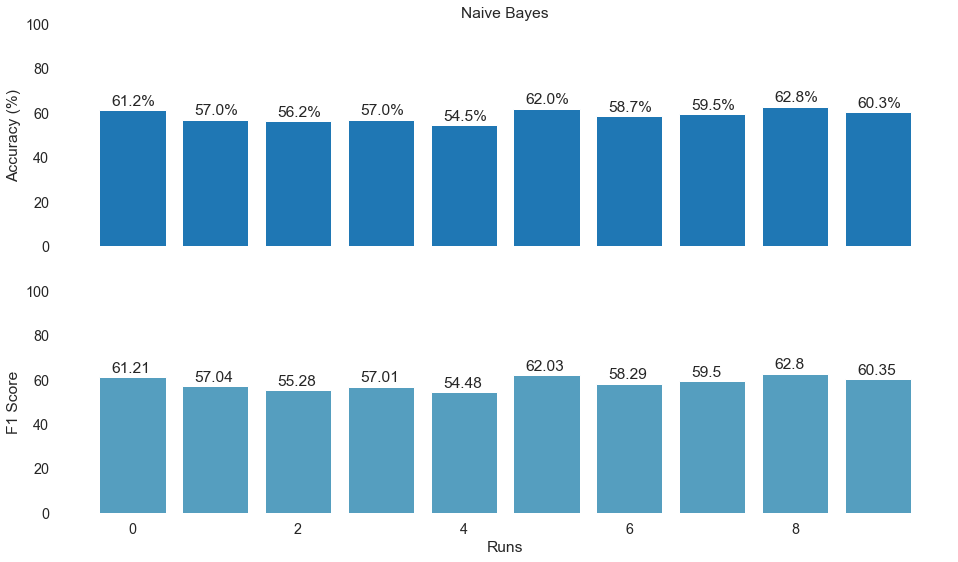

In [47]:
#pengujian k fold sebanyak 10 kali

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [48]:
#Membuat model klasifikasi, dimasukkan ke dalam file model_classifier_nbc.pickle
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


X = df.tweet
y = df.kelas

txt_classifier = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB(alpha=1.0)),
                     ])
X_train = np.asarray(X)
txt_classifier = txt_classifier.fit(X_train, np.asarray(y))

In [49]:
#simpan ke PICKLE
files = open('model_nbc.pickle', 'wb')
pickle.dump(txt_classifier, files)
files.close()

print('Proses Training Naive Bayes Selesai!')

Proses Training Naive Bayes Selesai!


In [50]:
#simpan ke PICKLE
model = open('model_nbc.pickle', 'rb')
nbc_classifier = pickle.load(model)
print(nbc_classifier)

Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])


In [51]:
df_tweet = pd.read_excel (r'data_testing.xlsx')
df_tweet=pd.DataFrame(df_tweet)
df_tweet=df_tweet.dropna()
df_tweet.head()

,no,tweet,label,kelas
0,1,ngeri dar awal kpu bukan wasit yang baik pante...,negatif,0
1,2,rkuhp buat nyali kurang,negatif,0
2,3,pasalpasal rkuhp lebih bahaya belum syariahmew...,negatif,0
3,4,UU omnibuslaw saja sahkan apa rkuhp,negatif,0
4,5,enggan perintah buka draf baru rkuhp nilai tun...,negatif,0


In [52]:
data_tweet = df_tweet.tweet

In [53]:
pd.DataFrame(data_tweet)

,tweet
0,ngeri dar awal kpu bukan wasit yang baik pante...
1,rkuhp buat nyali kurang
2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,UU omnibuslaw saja sahkan apa rkuhp
4,enggan perintah buka draf baru rkuhp nilai tun...
...,...
195,live st asas demokrasi ats st liberalisasi ber...
196,kuhp maupun rkuhp nilai penuh semua aspirasi r...
197,pak yasona yang hormat UU rupa diinclude dalam...
198,kelompok ahli hak asasi manusia ham serikat ba...


In [54]:
#melakukan prediksi
predicted = nbc_classifier.predict(np.asarray(data_tweet))

In [55]:
predicted

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0])

In [56]:
#menampilkan hasil positif dan negatif
result_tweet=[]
for i in range(len(predicted)):
    if(predicted[i]==1):
        sentiment_result='Positif'
    elif(predicted[i]==0):
        sentiment_result='Negatif'
#     result_tweet.append({'class':prediction_linear[i], 'result_nbc':sentiment_result})
    result_tweet.append({'Cleaned_Text':data_tweet[i], 'class':predicted[i] })

In [57]:
data=pd.DataFrame(result_tweet)
data.head()

,Cleaned_Text,class
0,ngeri dar awal kpu bukan wasit yang baik pante...,0
1,rkuhp buat nyali kurang,1
2,pasalpasal rkuhp lebih bahaya belum syariahmew...,1
3,UU omnibuslaw saja sahkan apa rkuhp,0
4,enggan perintah buka draf baru rkuhp nilai tun...,0


In [58]:
data.to_excel('hasil_testing.xlsx')

# data testing

In [26]:
#library pandas

import pandas as pd
df = pd.read_excel('hasil_testing1.xlsx')
df = pd.DataFrame(df)
df = df.dropna()
df

,Unnamed: 0,Cleaned_Text,actual,predicted
0,1.0,ngeri dar awal kpu bukan wasit yang baik pante...,0,0
1,2.0,rkuhp buat nyali kurang,0,0
2,3.0,pasalpasal rkuhp lebih bahaya belum syariahmew...,1,0
3,4.0,UU omnibuslaw saja sahkan apa rkuhp,0,0
4,5.0,enggan perintah buka draf baru rkuhp nilai tun...,0,0
...,...,...,...,...
195,196.0,live st asas demokrasi ats st liberalisasi ber...,0,0
196,197.0,kuhp maupun rkuhp nilai penuh semua aspirasi r...,0,0
197,198.0,pak yasona yang hormat UU rupa diinclude dalam...,0,0
198,199.0,kelompok ahli hak asasi manusia ham serikat ba...,0,0


In [27]:
#menghitung jumlah TP, FP, TN dan FN

df.loc[(df['actual'] == 1) & (df['predicted'] == 1), 'keterangan'] = 'TP'
df.loc[(df['actual'] == 1) & (df['predicted'] == 0), 'keterangan'] = 'FP'
df.loc[(df['actual'] == 0) & (df['predicted'] == 0), 'keterangan'] = 'TN'
df.loc[(df['actual'] == 0) & (df['predicted'] == 1), 'keterangan'] = 'FN'

In [28]:
df

,Unnamed: 0,Cleaned_Text,actual,predicted,keterangan
0,1.0,ngeri dar awal kpu bukan wasit yang baik pante...,0,0,TN
1,2.0,rkuhp buat nyali kurang,0,0,TN
2,3.0,pasalpasal rkuhp lebih bahaya belum syariahmew...,1,0,FP
3,4.0,UU omnibuslaw saja sahkan apa rkuhp,0,0,TN
4,5.0,enggan perintah buka draf baru rkuhp nilai tun...,0,0,TN
...,...,...,...,...,...
195,196.0,live st asas demokrasi ats st liberalisasi ber...,0,0,TN
196,197.0,kuhp maupun rkuhp nilai penuh semua aspirasi r...,0,0,TN
197,198.0,pak yasona yang hormat UU rupa diinclude dalam...,0,0,TN
198,199.0,kelompok ahli hak asasi manusia ham serikat ba...,0,0,TN


In [29]:
df.groupby(by='keterangan').agg('count')

,Unnamed: 0,Cleaned_Text,actual,predicted
keterangan,,,,
FN,15,15,15,15
FP,17,17,17,17
TN,154,154,154,154
TP,14,14,14,14


In [30]:
TP=df['keterangan'].value_counts()['TP']
TN=df['keterangan'].value_counts()['TN']
FP=df['keterangan'].value_counts()['FP']
FN=df['keterangan'].value_counts()['FN']

In [31]:
#menghitung akurasi data testing
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy =', accuracy)

Accuracy = 0.84


In [32]:
#menghitung precission data testing
precission = (TP) / (TP+FP)
print('Precission =', precission)

Precission = 0.45161290322580644


In [33]:
#menghitung recall data testing
recall = (TP) / (TP + FN)
print('Recall =', recall)

Recall = 0.4827586206896552


In [34]:
#menghitung f1-score data testing
F1_Score = 2 * (recall*precission) / (recall + precission)
print('F1Score =', F1_Score)

F1Score = 0.4666666666666667


# KLASIFIKASI

In [35]:
#membuka model pickle untuk data klasifikasi

model = open('model_nbc_pse.pickle', 'rb')
nbc_classifier = pickle.load(model)
print(nbc_classifier)

NameError: name 'pickle' is not defined

In [36]:
# importing pandas module
import pandas as pd

# reading the csv file
cvsDataframe = pd.read_csv('master_data.csv')

# creating an output excel file
resultExcelFile = pd.ExcelWriter('master_data.xlsx')

# converting the csv file to an excel file
cvsDataframe.to_excel(resultExcelFile, index=False)

# saving the excel file
resultExcelFile.save()



In [37]:
#menampilkan file excel klasifikasi data

df_tweet = pd.read_excel('master_data.xlsx')
df_tweet = pd.DataFrame(df_tweet)
df_tweet = df_tweet.fillna(' ')
df_tweet.head()


,Datetime,Username,Text
0,2022-12-17 23:52:09+00:00,harrisregar_2,"@panca66 Ngeri, sedari awal KPU bukan wasit yg..."
1,2022-12-17 23:45:22+00:00,Akagami_N_S,@ArrazHarun @Askrlfess Rkuhp membuat nyaliku b...
2,2022-12-17 22:58:19+00:00,Irfqn_,Pasal-pasal dalam RKUHP Lebih Berbahaya dari S...
3,2022-12-17 22:32:54+00:00,KangJar72175240,@AhmadHi18173118 @abu_waras UU omnibuslaw aja ...
4,2022-12-17 22:24:07+00:00,atjayapura,Keengganan pemerintah buka draf terbaru RKUHP ...


In [38]:
data_tweet = df_tweet.tweet

AttributeError: 'DataFrame' object has no attribute 'tweet'

In [ ]:
pd.DataFrame(data_tweet)

In [39]:
#melakukan prediksi pada data klasfikasi

predicted = nbc_classifier.predict(np.asarray(data_tweet))

NameError: name 'nbc_classifier' is not defined

In [40]:
predicted

NameError: name 'predicted' is not defined

In [41]:
#menampilkan hasil dari data klasifikasi

result_tweet=[]
for i in range(len(predicted)):
    if(predicted[i]==1):
        sentiment_result='Positif'
    elif(predicted[i]==0):
        sentiment_result='Negatif'
    result_tweet.append({'tweet':data_tweet[i], 'class':predicted[i]})
    #     result_tweet.append({'tweet':data_tweet[i], 'class':predicted[i], 'result_nbc':sentiment_result})

NameError: name 'predicted' is not defined

In [42]:
data=pd.DataFrame(result_tweet)
data

""


In [43]:
#menghitung jumlah sentimen

data.groupby(by='class').agg('count')

KeyError: 'class'

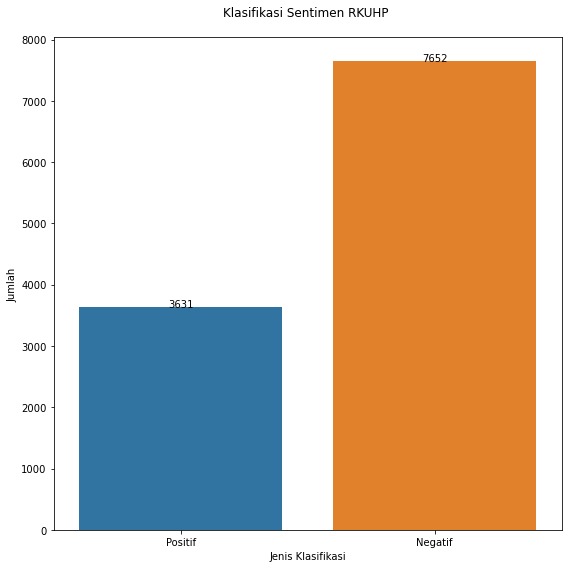

In [44]:
#Visualisasi sentimen negatif dan positif

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
x = ['Positif', 'Negatif',]
y = [3631,7652]
percentage = [3631,7652]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:}'.format(percentage[i]), (x, y), ha='center')
    
plt.title('Klasifikasi Sentimen RKUHP \n')
plt.xlabel('Jenis Klasifikasi')
plt.ylabel('Jumlah')    
plt.show()